# Lecture 1: Basic Python


![Python](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

## Zhentao Shi

### Basics

-  `[ ]` creates a list of vectors
-  Binary arithmetic operations `+`, `-`, `*` and `/` are performed element by element.
-  Arithmetic operators: exponends are expressed with `**`, and `%` is the reminder.
-  Binary logical operations `&`, `|`, `!=`, `=`, `<`, `>`, `>=`, `<=`.

### Array and Matrix

* Python was not originally designed for scientific computing.

* To work with arrays and matrices, we need the package `numpy`

In [ ]:
#Import the NumPy library
import numpy as np

# Import the Pandas library
import pandas as pd

#### Example

In [ ]:
# Create an array
A = np.array([[1,2,3],[4,5,6]])
A


In [ ]:
A.shape

In [ ]:
# Create a matrix (2-dimensional array)
M = np.matrix([[1,2],[3,4]])
M

## Key Differences Between Python and R

* Python is row-major, while R is column-major.
* The indexing of Python is 0-based, while that of R is 1-based.

In [ ]:
D = np.array([1,2,3,4,5,6]).reshape(2,3)
print(D)

In [ ]:
D + [1,2] # doesn't work

In [ ]:
D + [[1],[2]] # broadcasting

In [ ]:
F = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']
print(F)

In [ ]:
F[2:5]

In [ ]:

# the index rule in Python is more stringent.
D[0] # the first row

In [ ]:
D[0,:]

In [ ]:
D[:,0]

In [ ]:
D[1,2]

For further readings, please find a list of basic commands in the documentation of NumPy: 
https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

### OLS-Example
OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$\hat{\beta} = (X' X)^{-1} X'y.$
To conduct OLS estimation in Python, we literally translate the mathematical expression into code.

__Step 1__: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [ ]:
# simulate data
import random
np.random.seed(111) # can be removed to allow the result to change
# set the parameters
n = 100
b0 = np.matrix([ [1],[2] ] )
# generate the data
e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

__Step 2:__ translate the formula to code

In [ ]:
# OLS estimator
bhat = np.dot(np.linalg.inv(np.dot( X.T, X ) ), np.dot( X.T, y ) ) 
print(bhat)

__Step 3 (additional):__ plot the regression graph with the scatter points and the regression line.
Further compare the regression line (black) with the true coefficient line (red).

In [ ]:
# Import MathPlotLib
import matplotlib.pyplot as plt
X1 = X[:, 1]
plt.plot(X1, y, 'o')
plt.plot(X1, np.dot(X, b0), color='red', linestyle='-')
plt.plot(X1, np.dot(X, bhat), color='black', linestyle='-')
plt.title('regression')
plt.xlabel('x1')
plt.ylabel('y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

__Step 4:__ In econometrics we are often interested in hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.

In [ ]:
# Import Math

# Calculate the t-value
bhat2 = bhat.item(1) # item( ) is a new function I learn today

e_hat = y - np.dot(X, bhat)
sigma_hat_square = np.dot(e_hat.T, e_hat).item(0) / (n-2)

Sigma_B = np.linalg.inv(np.dot(X.T, X)) * sigma_hat_square
t_value_2 = (bhat2 - b0[1, 0]) / np.sqrt(Sigma_B[1, 1])
print(t_value_2)

### Package/Module/Library

* Python has numerous useful packages/modules/libraries. 
* Install the targeted package into the environment.



### Input and Output

To read and write csv files in Python, use the pandas library.

#### Example:

In [ ]:
import pandas as pd
sample_data = pd.read_csv('data_example/AJR.csv')
sample_data.head()

In [ ]:
sample_data = sample_data.dropna()

# write the sampe_data to a csv file
sample_data.to_csv('data_example/AJR_from_py.csv', index = False)


### Statistics

* The package `SciPy` is for statistics. 
* Commonly used probability distributions in `SciPy.stats`


##### Example:

C:\Users\zhent\AppData\Local\Temp\ipykernel_23088\3930501868.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z, hist = False, color = 'red')


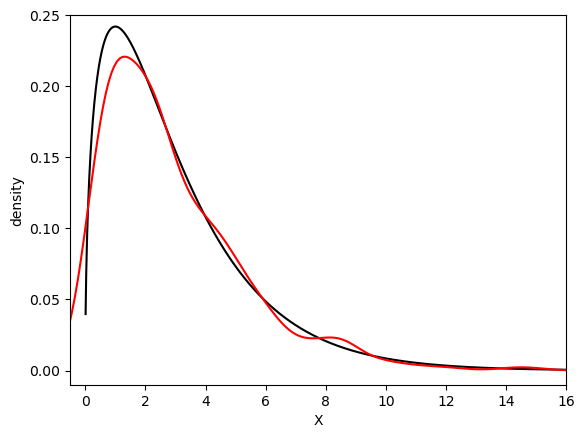

In [1]:
# Import Packages
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0.01, 16, num = 1600)
y = stats.chi2.pdf(x, 3)
z = stats.chi2.rvs(3, size = 1000)

plt.plot(x, y, linestyle = '-', color = 'black')
sns.distplot(z, hist = False, color = 'red')
plt.xlim(-0.5, 16)
plt.ylim(-0.01, 0.25)
plt.xlabel('X')
plt.ylabel('density')
plt.show()

In [ ]:
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(len([i for i in z if i > crit]) / len(z))

### User-defined function

The format of a user-defined function in Python is

```            
def function_name(input):

    expressions 
    
    return output
```

##### Example:

If the central limit theorem is applicable, then
we can calculate the 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.
It is an easy job.

In [6]:
#construct confidence interval

def CI(x):
    #x is a vector of random variables
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x)
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}
    # return a tuple

### Flow Control

* `if` is used for choice
* `for` or `while` is used for loops.

**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [14]:
import datetime
from scipy import stats

Rep = 1000
sample_size = 100
capture = [0] * Rep


for i in range(Rep):
    mu = 2
    x = stats.poisson.rvs(mu, size = sample_size)
    bounds = CI(x)
    if (bounds['lower'] <= mu and mu <= bounds['upper']):
        capture[i] = 1
    

print(np.mean(capture))

0.955


### Statistical Model

* Statistical models are formulated as `y~x`
* In the package `scikit-learn`, we run OLS using `LinearRegression()`

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

T = 30
p = 2
b0 = np.full([p,1], 1 )

#generate data
x = stats.norm.rvs(size = [T,p])
y = np.dot(x, b0) + stats.norm.rvs(size = [T,1])


#Linear model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

## Display

* `result` object is a list containing the regression results. 
  * Estimated coefficients, 
  * t-stat
  * F-stat
  * R-sqaured.

In [ ]:
plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Plot

* plot the true value of $y$ and fitted value $\hat{y}$

In [ ]:
x0 = x[:,0]
plt.plot(x0, x0*b0.item(0), color = 'red', label = 'True Coef')
plt.scatter(x0, y, color = 'black', marker = 'o')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()